In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:

##* baselines algorithms


with h5py.File("results/results_LM_test_V4.hdf5", "r") as f:
    best_loss_LM_train = f["best_loss_train"][:]
    iters_LM = f['iters'][:]+1
    loss_LM_test = f["loss_test"][:]





In [5]:

###* hierarchical results

with h5py.File("results/results_hier0_test_V4.h5", "r") as f:
    best_loss_hier0_train = f['best_loss_train'][:]
    iters_hier0 = f['iters'][:]
    loss_hier0_test = f['loss_test'][:]


with h5py.File("results/results_hier1_test_V4.h5", "r") as f:
    best_loss_hier1_train = f['best_loss_train'][:]
    iters_hier1 = f['iters'][:]
    loss_hier1_test = f['loss_test'][:]



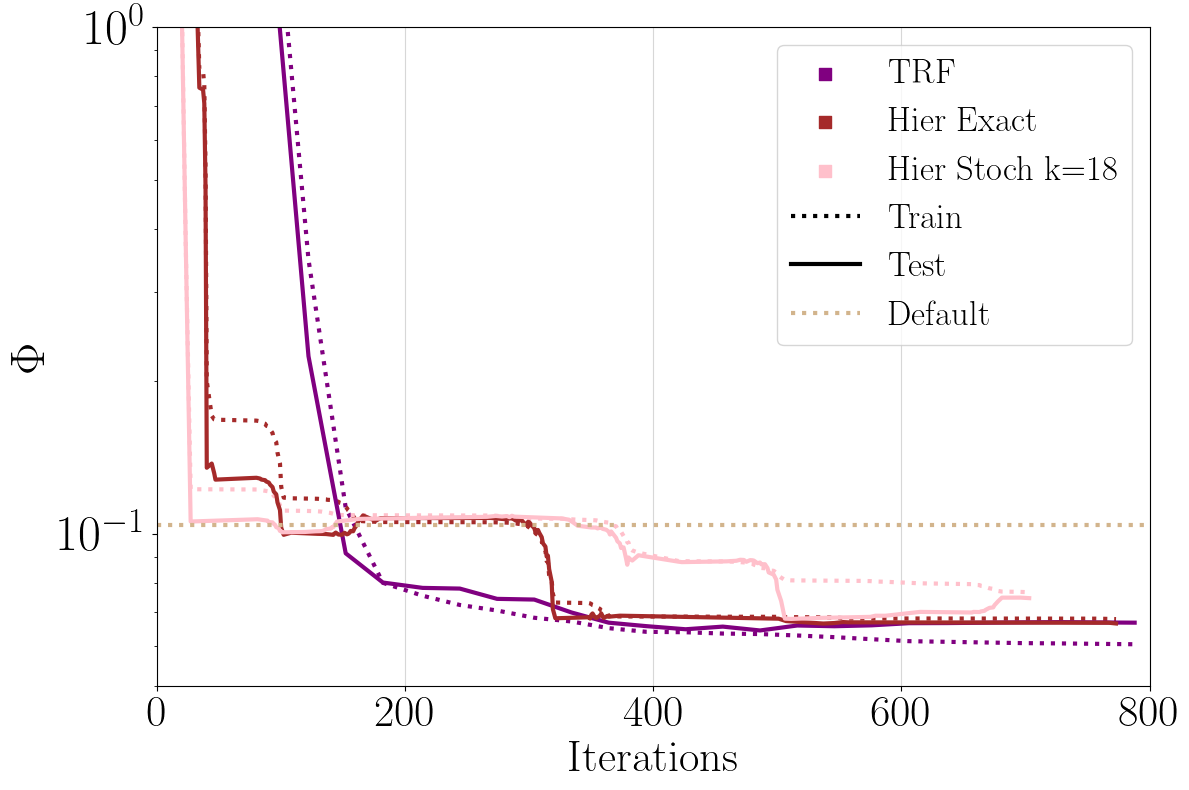

In [8]:

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

shift_LM = 4

color_LM = "purple"
color_hier0 = "brown"
color_hier1 = "pink"

ax.plot(iters_LM[:-shift_LM], best_loss_LM_train[:-shift_LM], linewidth=3, color=color_LM, linestyle='dotted')
ax.plot(iters_hier0[:-shift_LM], best_loss_hier0_train[:-shift_LM], linewidth=3.0,  color=color_hier0, linestyle='dotted')
ax.plot(iters_hier1, best_loss_hier1_train, linewidth=3.0, color=color_hier1, linestyle='dotted')

ax.plot(iters_LM[:-shift_LM], loss_LM_test[:-shift_LM], linewidth=3, color=color_LM)
ax.plot(iters_hier0[:-shift_LM], loss_hier0_test[:-shift_LM], linewidth=3.0, color=color_hier0)
ax.plot(iters_hier1, loss_hier1_test, linewidth=3.0, color=color_hier1)


ax.scatter([], [], s=80.0, marker='s', label="TRF", color=color_LM)
ax.scatter([], [], s=80.0, marker='s', label="Hier Exact", color=color_hier0)
ax.scatter([], [], s=80.0, marker='s', label="Hier Stoch k=18", color=color_hier1)

ax.plot([], [], linewidth=3.0, linestyle='dotted', label="Train", color="black")
ax.plot([], [], linewidth=3.0, label="Test", color="black")


ax.axhline(y=0.1038, linewidth=3, linestyle='dotted', color='tan', label="Default")

# plt.xscale('log')
plt.yscale('log')
plt.ylim(0.05, 1.0)
plt.xlim(-0.02, 800.2)
# plt.grid()
plt.xlabel(r'Iterations', fontsize=32)
plt.ylabel(r'$\Phi$', fontsize=35)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=36)
ax.legend(fontsize=25)

plt.grid(axis='x', which='major', linestyle='-', linewidth=0.8, alpha=0.5)
ax.axhline(y=1.0, color='gray', linestyle='-', linewidth=0.8, alpha=0.5)


plt.tight_layout()
plt.savefig("panel_generalization_algos_train_test_V4.png")